In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])


In [5]:
weights_path = 'models/.weights.h5'
model.load_weights(weights_path)

model.save('models/complete_model.h5')


In [9]:
model_path = 'models/complete_model.h5' 
test_folder = 'dataset/test'

model = load_model(model_path)

In [10]:
img_height, img_width = 128, 128 
class_names = sorted(os.listdir(test_folder))

In [11]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_height, img_width))  
    img_array = img_to_array(img)  
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  
    return img, img_array

In [12]:
def predict_and_visualize(image_path, actual_class):
    img, img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)  # Predict
    predicted_class = class_names[np.argmax(predictions)]  # Predicted class
    confidence = np.max(predictions)  # Confidence of the prediction

    # Check if the prediction matches the actual class
    is_correct = predicted_class == actual_class

    # Visualize
    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}\nActual: {actual_class}\nConfidence: {confidence:.2f}')
    plt.axis('off')
    plt.show()

    return is_correct

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


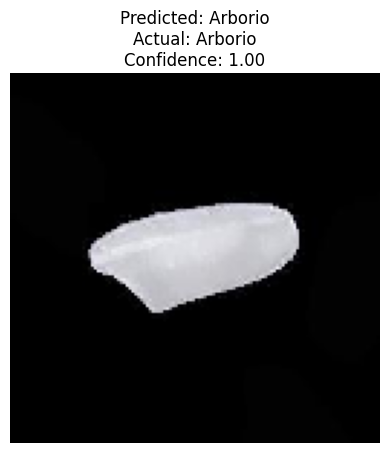

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


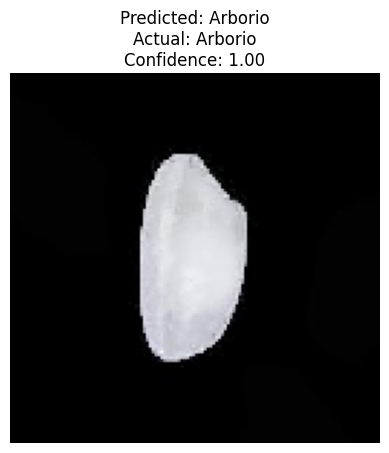

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


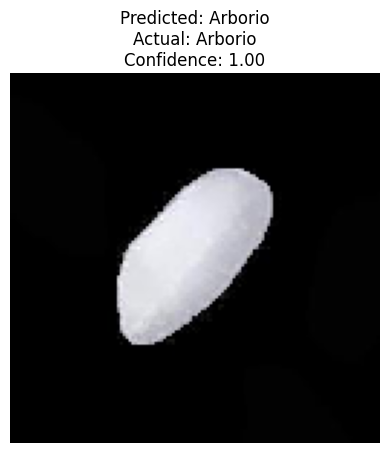

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


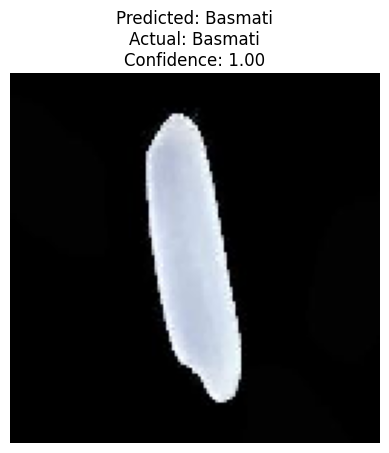

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


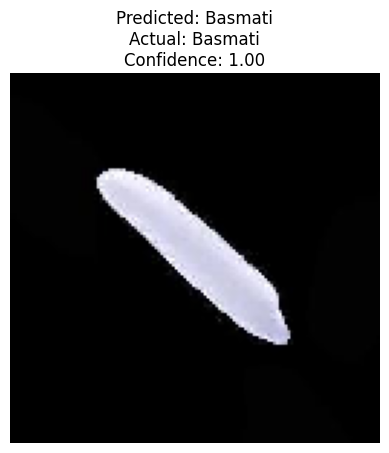

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


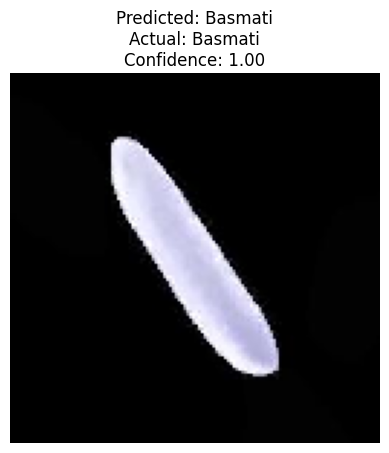

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


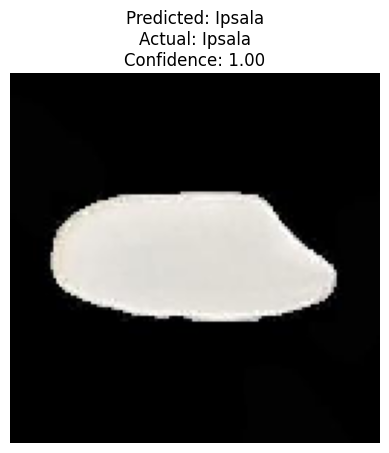

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


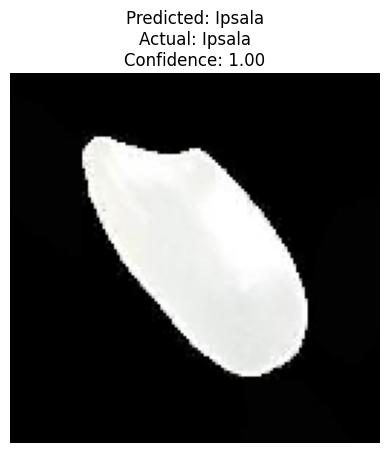

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


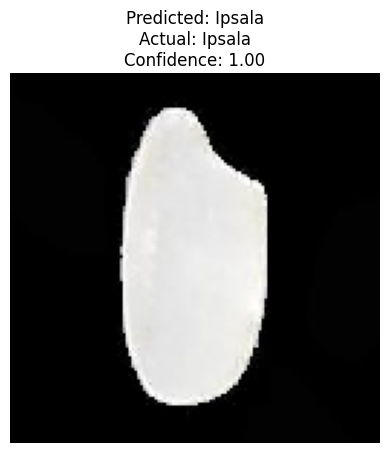

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


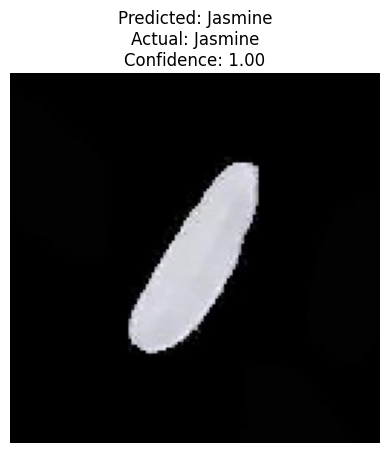

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


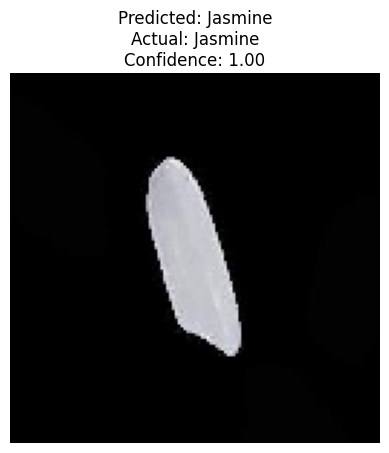

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


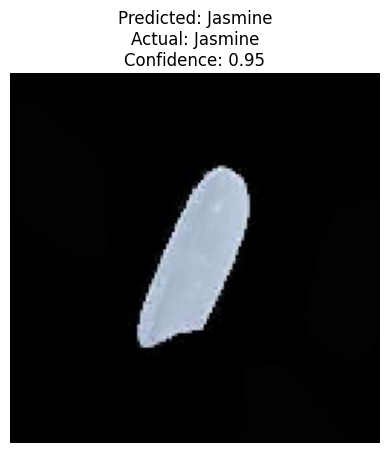

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


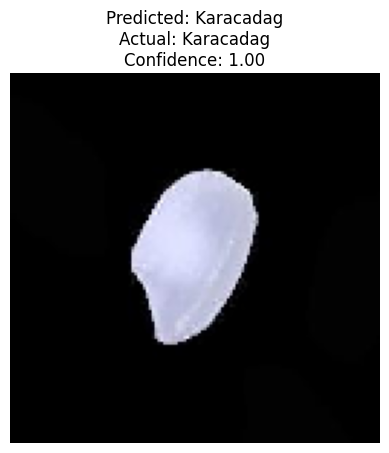

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


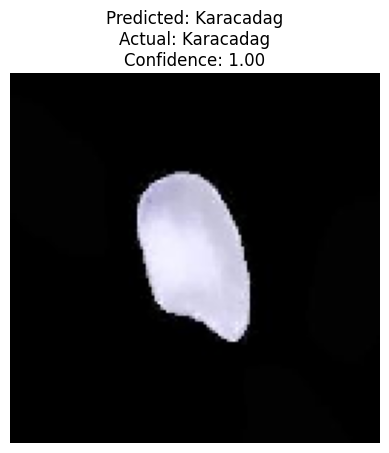

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


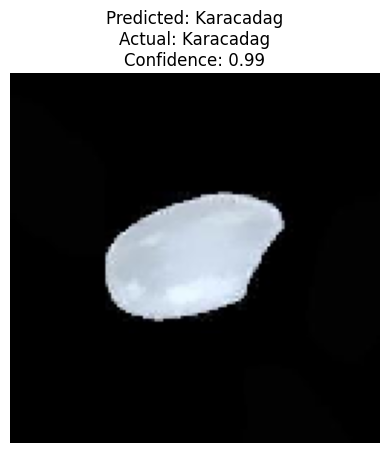

In [14]:
import random

for class_name in class_names:
    class_path = os.path.join(test_folder, class_name)
    images = os.listdir(class_path)
    random_images = random.sample(images, min(3, len(images)))  # Pick up to 3 images per class

    for image in random_images:
        image_path = os.path.join(class_path, image)
        predict_and_visualize(image_path, class_name)